## DESCRIPTION


### This dataset is curated for a data analysis project focusing on a financial transactions and customer behaviour.
### It includes structured data to explore patterns ,trends and anomalies in banking activities .It contains various data regarding transaction id,transaction type,location,customer age etc.

###

## Importing libraries


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Loading data

In [2]:
df= pd.read_csv('E:\data science\dataset\\bank transaction.csv')
print(df.head(5))
print(df.tail(5))

  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0           70             Doctor                   81 

## Get info of data 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  TransactionDuration      2512 non-null   int64  
 13  LoginAttempts            2512 non-null   int64  
 14  AccountBalance          

## Cleaning data
### Finding null values ,checking duplicates,deleting coloumns ,renaming columns, changing data type, checking outliers

* deleting the column transaction duration as its not relevant for the case study

In [4]:
del df['TransactionDuration']
print(df)

     TransactionID AccountID  TransactionAmount      TransactionDate  \
0         TX000001   AC00128              14.09  2023-04-11 16:29:14   
1         TX000002   AC00455             376.24  2023-06-27 16:44:19   
2         TX000003   AC00019             126.29  2023-07-10 18:16:08   
3         TX000004   AC00070             184.50  2023-05-05 16:32:11   
4         TX000005   AC00411              13.45  2023-10-16 17:51:24   
...            ...       ...                ...                  ...   
2507      TX002508   AC00297             856.21  2023-04-26 17:09:36   
2508      TX002509   AC00322             251.54  2023-03-22 17:36:48   
2509      TX002510   AC00095              28.63  2023-08-21 17:08:50   
2510      TX002511   AC00118             185.97  2023-02-24 16:24:46   
2511      TX002512   AC00009             243.08  2023-02-14 16:21:23   

     TransactionType          Location DeviceID      IP Address MerchantID  \
0              Debit         San Diego  D000380  162.198.

* checking if column removed

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2512 non-null   object 
 1   AccountID                2512 non-null   object 
 2   TransactionAmount        2512 non-null   float64
 3   TransactionDate          2512 non-null   object 
 4   TransactionType          2512 non-null   object 
 5   Location                 2512 non-null   object 
 6   DeviceID                 2512 non-null   object 
 7   IP Address               2512 non-null   object 
 8   MerchantID               2512 non-null   object 
 9   Channel                  2512 non-null   object 
 10  CustomerAge              2512 non-null   int64  
 11  CustomerOccupation       2512 non-null   object 
 12  LoginAttempts            2512 non-null   int64  
 13  AccountBalance           2512 non-null   float64
 14  PreviousTransactionDate 

### checking null values 

In [6]:
print(df.isna().sum())

TransactionID              0
AccountID                  0
TransactionAmount          0
TransactionDate            0
TransactionType            0
Location                   0
DeviceID                   0
IP Address                 0
MerchantID                 0
Channel                    0
CustomerAge                0
CustomerOccupation         0
LoginAttempts              0
AccountBalance             0
PreviousTransactionDate    0
dtype: int64


### checking duplicates


In [7]:
print(df.duplicated().sum())

0


### renaming columns

In [8]:
print(df.rename(columns={'TransactionID':'tr_id','AccountID':'acc_id','TransactionAmount':'tr_amt','TransactionDate':'tr_date',
                        'TransactionType':'tr_type','IP Address':'ip_add','CustomerOccupation':'customer_occ',
                        'LoginAttempts':'login_att','AccountBalance':'acc_bal','PreviousTransactionDate':'prev_tr_date'},inplace=True))
print(df.info())

None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   tr_id         2512 non-null   object 
 1   acc_id        2512 non-null   object 
 2   tr_amt        2512 non-null   float64
 3   tr_date       2512 non-null   object 
 4   tr_type       2512 non-null   object 
 5   Location      2512 non-null   object 
 6   DeviceID      2512 non-null   object 
 7   ip_add        2512 non-null   object 
 8   MerchantID    2512 non-null   object 
 9   Channel       2512 non-null   object 
 10  CustomerAge   2512 non-null   int64  
 11  customer_occ  2512 non-null   object 
 12  login_att     2512 non-null   int64  
 13  acc_bal       2512 non-null   float64
 14  prev_tr_date  2512 non-null   object 
dtypes: float64(2), int64(2), object(11)
memory usage: 294.5+ KB
None


In [9]:
print(df.head(1))

      tr_id   acc_id  tr_amt              tr_date tr_type   Location DeviceID  \
0  TX000001  AC00128   14.09  2023-04-11 16:29:14   Debit  San Diego  D000380   

           ip_add MerchantID Channel  CustomerAge customer_occ  login_att  \
0  162.198.218.92       M015     ATM           70       Doctor          1   

   acc_bal         prev_tr_date  
0  5112.21  2024-11-04 08:08:08  


### changing datatypes

In [10]:
df['tr_date']=df['tr_date'].astype('datetime64[s]')
df['tr_type']=df['tr_type'].astype('string')
df['Location']=df['Location'].astype('string')
df['Channel']=df['Channel'].astype('string')
df['customer_occ']=df['customer_occ'].astype('string')
df['prev_tr_date']=df['prev_tr_date'].astype('datetime64[s]')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2512 entries, 0 to 2511
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype        
---  ------        --------------  -----        
 0   tr_id         2512 non-null   object       
 1   acc_id        2512 non-null   object       
 2   tr_amt        2512 non-null   float64      
 3   tr_date       2512 non-null   datetime64[s]
 4   tr_type       2512 non-null   string       
 5   Location      2512 non-null   string       
 6   DeviceID      2512 non-null   object       
 7   ip_add        2512 non-null   object       
 8   MerchantID    2512 non-null   object       
 9   Channel       2512 non-null   string       
 10  CustomerAge   2512 non-null   int64        
 11  customer_occ  2512 non-null   string       
 12  login_att     2512 non-null   int64        
 13  acc_bal       2512 non-null   float64      
 14  prev_tr_date  2512 non-null   datetime64[s]
dtypes: datetime64[s](2), float64(2), int64(2), object(5), s

### checking outliers using boxplot

([0, 1, 2, 3],
 [Text(0, 0, 'tr_amt'),
  Text(1, 0, 'CustomerAge'),
  Text(2, 0, 'login_att'),
  Text(3, 0, 'acc_bal')])

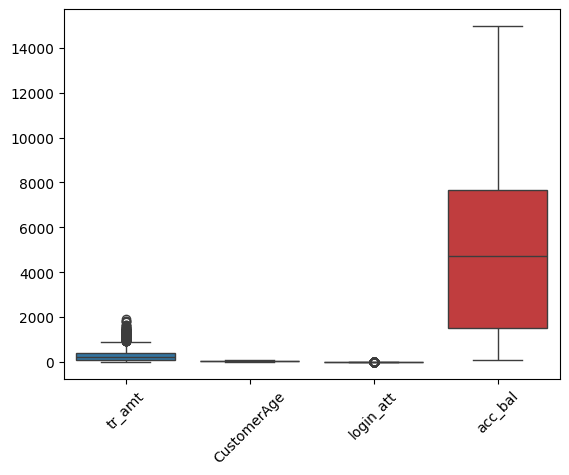

In [11]:
sns.boxplot(data=df)
plt.xticks(rotation=45)

### removing outliers using zscore

In [12]:
col1=['tr_amt','CustomerAge','login_att']
threshold=1.5
for col in col1:
 df[f'z_score{col}']=(df[col]-df[col].mean())/df[col].std()
df1=df[(df[[f'z_score{col}' for col in col1]].abs() <= threshold).all(axis=1)]
print(df1)
df1=df1.drop(columns=[f'z_score{col}' for col in col1])

         tr_id   acc_id  tr_amt             tr_date tr_type      Location  \
0     TX000001  AC00128   14.09 2023-04-11 16:29:14   Debit     San Diego   
1     TX000002  AC00455  376.24 2023-06-27 16:44:19   Debit       Houston   
2     TX000003  AC00019  126.29 2023-07-10 18:16:08   Debit          Mesa   
3     TX000004  AC00070  184.50 2023-05-05 16:32:11   Debit       Raleigh   
4     TX000005  AC00411   13.45 2023-10-16 17:51:24  Credit       Atlanta   
...        ...      ...     ...                 ...     ...           ...   
2506  TX002507  AC00258   92.24 2023-04-13 17:45:33   Debit  Philadelphia   
2508  TX002509  AC00322  251.54 2023-03-22 17:36:48   Debit        Tucson   
2509  TX002510  AC00095   28.63 2023-08-21 17:08:50   Debit     San Diego   
2510  TX002511  AC00118  185.97 2023-02-24 16:24:46   Debit        Denver   
2511  TX002512  AC00009  243.08 2023-02-14 16:21:23  Credit  Jacksonville   

     DeviceID          ip_add MerchantID Channel  CustomerAge customer_occ 

([0, 1, 2, 3],
 [Text(0, 0, 'tr_amt'),
  Text(1, 0, 'CustomerAge'),
  Text(2, 0, 'login_att'),
  Text(3, 0, 'acc_bal')])

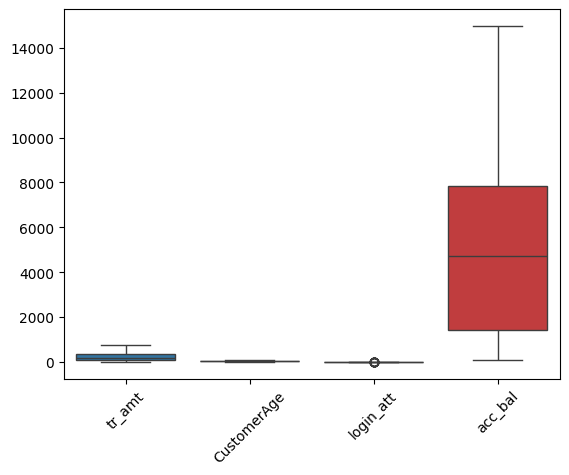

In [13]:
sns.boxplot(data=df1)
plt.xticks(rotation=45)

* maximum outliers has been removed using z_score 

## STATISTICAL ANALYSIS
### Functions used: describe(),cov(),corr(),std()

In [14]:
print(df1.describe().round())

       tr_amt              tr_date  CustomerAge  login_att  acc_bal  \
count  2038.0                 2038       2038.0     2038.0   2038.0   
mean    228.0  2023-07-05 04:11:45         42.0        1.0   5106.0   
min       0.0  2023-01-02 16:00:06         18.0        1.0    101.0   
25%      75.0  2023-04-01 12:14:15         27.0        1.0   1425.0   
50%     182.0  2023-07-05 17:07:02         42.0        1.0   4726.0   
75%     345.0  2023-10-09 16:50:13         57.0        1.0   7847.0   
max     735.0  2024-01-01 18:21:50         71.0        2.0  14978.0   
std     183.0                  NaN         16.0        0.0   3966.0   

              prev_tr_date  
count                 2038  
mean   2024-11-04 08:09:22  
min    2024-11-04 08:06:23  
25%    2024-11-04 08:07:55  
50%    2024-11-04 08:09:23  
75%    2024-11-04 08:10:53  
max    2024-11-04 08:12:23  
std                    NaN  


In [15]:
print(df1.cov(numeric_only=True).round())

              tr_amt  CustomerAge  login_att     acc_bal
tr_amt       33380.0        -64.0        0.0    -31594.0
CustomerAge    -64.0        256.0        0.0     24887.0
login_att        0.0          0.0        0.0         5.0
acc_bal     -31594.0      24887.0        5.0  15725612.0


In [16]:
print(df1.corr(numeric_only=True).round())

             tr_amt  CustomerAge  login_att  acc_bal
tr_amt          1.0         -0.0        0.0     -0.0
CustomerAge    -0.0          1.0        0.0      0.0
login_att       0.0          0.0        1.0      0.0
acc_bal        -0.0          0.0        0.0      1.0


In [17]:
print(df1.std(numeric_only=True).round())

tr_amt          183.0
CustomerAge      16.0
login_att         0.0
acc_bal        3966.0
dtype: float64


# EXPLORATORY DATA ANALYSIS

1. what is the frequency of transaction types used among customers

tr_type
Credit     449
Debit     1589
dtype: int64


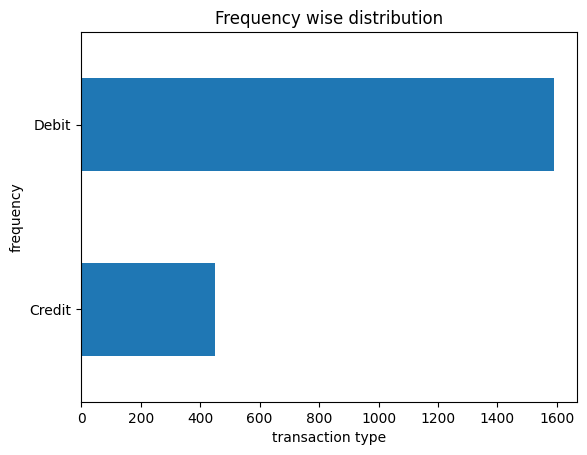

In [18]:
f1=df1.groupby('tr_type').size()
print(f1)
f1.plot(kind='barh',title='Frequency wise distribution')
plt.xlabel('transaction type')
plt.ylabel('frequency')
plt.show()

2. What is the average transaction amount based on customer occupation.


customer_occ
Doctor      214.731827
Engineer    227.900144
Retired     232.387224
Student     236.863310
Name: tr_amt, dtype: float64


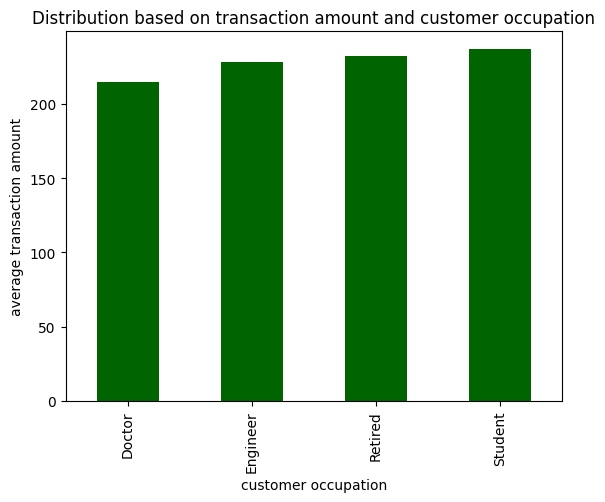

In [19]:
t1=df1.groupby('customer_occ')['tr_amt'].mean()
print(t1)
t1.plot(kind='bar',color='#006400',title='Distribution based on transaction amount and customer occupation')
plt.xlabel('customer occupation')
plt.ylabel('average transaction amount')
plt.show()

3. what is the total transaction amount based on customer occupation

In [20]:
print(df1.groupby('customer_occ')['tr_amt'].sum())


customer_occ
Doctor      116384.65
Engineer    126256.68
Retired      86215.66
Student     135248.95
Name: tr_amt, dtype: float64


4. what is average transaction amount based on customer age 

CustomerAge
18    220.810200
19    251.988125
20    201.243721
21    238.713390
22    282.147647
23    239.113333
24    203.774146
25    225.931290
26    245.667342
27    256.873750
28    231.249500
29    278.566562
30    157.953333
31    175.430323
32    219.132500
33    207.271481
34    195.142581
35    233.114091
36    242.270000
37    228.223929
38    171.727619
39    230.475313
40    202.526786
41    217.640690
42    262.227097
43    276.572593
44    289.844615
45    169.964583
46    275.683714
47    268.649444
48    229.249167
49    169.047838
50    188.521600
51    222.560392
52    199.049750
53    221.255686
54    214.189524
55    252.612857
56    191.246923
57    203.954107
58    226.225435
59    226.451860
60    271.314737
61    325.125600
62    193.111212
63    187.335714
64    247.540789
65    209.360000
66    242.541429
67    192.735000
68    240.300233
69    245.301034
70    225.628421
71    186.890000
Name: tr_amt, dtype: float64


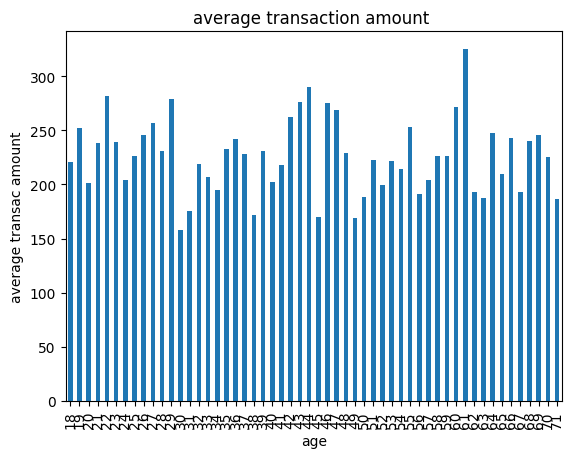

CustomerAge
61    325.125600
44    289.844615
22    282.147647
29    278.566562
43    276.572593
46    275.683714
60    271.314737
47    268.649444
42    262.227097
27    256.873750
Name: tr_amt, dtype: float64


In [21]:
c1=df1.groupby('CustomerAge')['tr_amt'].mean()
print(c1)
c1.plot(kind='bar',title='average transaction amount ')
plt.xlabel('age')
plt.ylabel('average transac amount')
plt.xticks(rotation=90)
plt.show()
c2=df1.groupby('CustomerAge')['tr_amt'].mean().sort_values(ascending=False).head(10)
print(c2)

5. How does the transaction amount differ across various locations

Location
Albuquerque          7385.34
Atlanta             10779.88
Austin               9286.42
Baltimore           10583.06
Boston              12036.06
Charlotte           13269.49
Chicago             10934.43
Colorado Springs    11037.54
Columbus             9380.14
Dallas               7501.31
Denver              11910.02
Detroit             12633.06
El Paso              8475.24
Fort Worth          12291.93
Fresno              11400.87
Houston             11272.47
Indianapolis        12631.40
Jacksonville        11098.42
Kansas City         12512.04
Las Vegas           11284.45
Los Angeles         11351.20
Louisville           7345.26
Memphis              9992.35
Mesa                14788.70
Miami               10606.62
Milwaukee            9845.04
Nashville           11319.86
New York            10130.03
Oklahoma City       13760.76
Omaha               12532.47
Philadelphia        11193.37
Phoenix              9004.21
Portland             8393.75
Raleigh              9771.31
Sacra

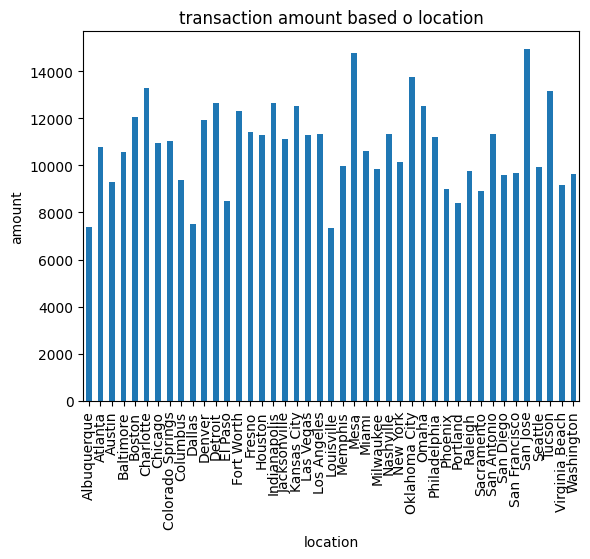

In [22]:
l1=df1.groupby('Location')['tr_amt'].sum()
print(l1)
l1.plot(kind='bar',title='transaction amount based o location')
plt.xlabel('location')
plt.ylabel('amount')
plt.show()


6.What is the percentage of transactions made through each channel

In [23]:
t2= df1['Channel'].value_counts(normalize=True)*100
print(t2)

Channel
Branch    35.132483
ATM       33.169774
Online    31.697743
Name: proportion, dtype: Float64


7. which location has the highest transaction amount

In [24]:
l2=df1.groupby('Location')['tr_amt'].sum().sort_values(ascending=False).head(3)
print(l2)

Location
San Jose         14939.03
Mesa             14788.70
Oklahoma City    13760.76
Name: tr_amt, dtype: float64


8. How does channels differ based on location

In [25]:
ch1=df1.groupby(['Location','Channel']).size().reset_index(name='count')
print(ch1)

           Location Channel  count
0       Albuquerque     ATM     11
1       Albuquerque  Branch     11
2       Albuquerque  Online     14
3           Atlanta     ATM     13
4           Atlanta  Branch     17
..              ...     ...    ...
124  Virginia Beach  Branch     19
125  Virginia Beach  Online     13
126      Washington     ATM      9
127      Washington  Branch     15
128      Washington  Online     12

[129 rows x 3 columns]


9.How does the time between transaction date and previous transaction date affect the transaction amount

In [26]:
df1['timegap'] = (df1['tr_date'] - df1['prev_tr_date']).dt.days
relation1=df1['tr_amt'].corr(df1['timegap'])
print(relation1.__round__())





0


10. How does login attempts relate with account balance?

In [27]:
r1=df1['login_att'].corr(df1['acc_bal'])
print(r1)

0.012300050031712207


11. how does customer occupation vary with account balance?

In [28]:
print(df1.groupby('customer_occ')['acc_bal'].sum())



customer_occ
Doctor      4844544.34
Engineer    3035713.65
Retired     1655567.06
Student      871175.70
Name: acc_bal, dtype: float64


12. which customer occupation has done highest number of transaction  

In [29]:
cus1=df1.groupby('customer_occ')['tr_id'].size().sort_values(ascending=False)
print(cus1)

customer_occ
Student     571
Engineer    554
Doctor      542
Retired     371
Name: tr_id, dtype: int64


13. what is the frequency of channels used by customers?

In [30]:
print(df1.groupby('Channel').size())

Channel
ATM       676
Branch    716
Online    646
dtype: int64


14.Do any customers exhibit unusually high numbers of failed login attempts (login_att)?

In [31]:
attempt = 3
df1['failed_attempts'] = df1['login_att'].apply(lambda y: 'failed attempt' if abs(y) > attempt else 'ok')
failed_logins = df1[df1['failed_attempts'] == 'failed attempt']
print(failed_logins)



Empty DataFrame
Columns: [tr_id, acc_id, tr_amt, tr_date, tr_type, Location, DeviceID, ip_add, MerchantID, Channel, CustomerAge, customer_occ, login_att, acc_bal, prev_tr_date, timegap, failed_attempts]
Index: []


* no suspicious login attempts found

15.Are large withdrawals or deposits followed by immediate transactions, suggesting potential money laundering

In [32]:
threshold=1000
df1['large transactions']=df1['tr_amt'].apply(lambda x: 'large'if abs(x)>threshold else 'normal')
df1=df1.sort_values(['acc_id','tr_date'])
df1['time_gap']=(df1['tr_date']-df1['prev_tr_date']).dt.total_seconds() /60
df1['suspicious']= (df1['large transactions']=='large')& (df1['time_gap']<60)
suspicious_tr=df1[df1['suspicious']==True]
print(suspicious_tr[['acc_id','tr_date','tr_amt','prev_tr_date','time_gap']])

Empty DataFrame
Columns: [acc_id, tr_date, tr_amt, prev_tr_date, time_gap]
Index: []


16. find the frequency of merchant id used

In [33]:
print(df1.groupby('MerchantID').size().sort_values(ascending=False))

MerchantID
M026    35
M014    30
M066    30
M068    29
M013    28
        ..
M056    13
M072    12
M077    11
M079    11
M006    10
Length: 100, dtype: int64


17. finding transaction id corresponding to merchant id 

In [34]:
merchant_1= df1.groupby('MerchantID')['tr_id'].size().sort_values(ascending=False)
print(merchant_1)
mean_tr=merchant_1.mean()
std_tr=merchant_1.std()


MerchantID
M026    35
M014    30
M066    30
M068    29
M013    28
        ..
M056    13
M072    12
M077    11
M079    11
M006    10
Name: tr_id, Length: 100, dtype: int64


18.find merchant id with anomalies

In [35]:
anomalies=merchant_1[merchant_1>mean_tr+2*std_tr]
print(anomalies)

MerchantID
M026    35
M014    30
M066    30
Name: tr_id, dtype: int64


* anomalies is found with three merchant id 

* finding the details of merchat ids

In [36]:
anomalous_merchant=anomalies.index
m1=df1[df1['MerchantID'].isin(anomalous_merchant)][['MerchantID','tr_id','tr_amt']]
print(m1)

     MerchantID     tr_id  tr_amt
1028       M026  TX001029  516.47
2441       M066  TX002442   61.62
1819       M014  TX001820  365.43
759        M066  TX000760  417.80
215        M026  TX000216   74.88
...         ...       ...     ...
1380       M014  TX001381  421.74
1558       M014  TX001559  659.15
351        M066  TX000352   29.58
2336       M014  TX002337   63.33
2349       M026  TX002350  134.55

[95 rows x 3 columns]


19. finding merchant id with highest transaction amount

In [37]:
print(df1.groupby('MerchantID')['tr_amt'].sum().sort_values(ascending=False).head(1))

MerchantID
M026    8109.63
Name: tr_amt, dtype: float64


20. finding the customer occupation related to merchant id M026 and the percentage of transaction done by them

In [38]:
mercahntid=df1[df1['MerchantID']=='M026']
mec_id=mercahntid['customer_occ'].value_counts(normalize=True)*100
print(mec_id)

customer_occ
Engineer         40.0
Student     25.714286
Doctor      25.714286
Retired      8.571429
Name: proportion, dtype: Float64


## ANALYSIS SUMMARY

From the data analysis of data set containing banking transactions following insights has been obtained :
* The analysis revealed a total of 449 credit transactions and 1589 debit transactions which suggests that most customers are engaged in spending or withdrawal activities rather than depositing funds.
* Students were found to have the highest transaction amount, totaling INR 135,248.95, which may be used for educational purposes.
* The total account balance for students was INR 4,844,544.34, reflecting a substantial amount of funds across student accounts. Students also had the highest number of transactions, totaling 571 transactions, which highlights frequent engagement with their accounts.
* San Jose recorded the highest transaction amount of INR 14,939.03, followed by Mesa with INR 14,788.70, and Oklahoma City with INR 13,760.76. 
* 35% of transactions were made through branches, suggesting that a notable portion of customers still prefer to complete their transactions at physical locations.
* No failed login attempts were found, indicating that there are no access issues for customer accounts.
* No large deposits or withdrawals were identified, suggesting that there were no unusual or suspicious large fund movements.
* Three merchant IDs—M014, M026, and M066—were identified with potential anomalies based on transaction volume or patterns. Notably, MerchantID M026 had the highest transaction count of 35 transactions  which may require further inspection to determine if it indicates any fraudulent activity.
* No correlation was found between transaction date and transaction amount, suggesting that transaction amounts are not influenced by specific dates or times.
* No correlation was identified between login attempts and account balance, indicating that the frequency of login attempts does not have a significant impact on account balances.